In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read Dataset
research_data_raw = pd.read_csv('Datasets/bitcoin_research_data_v2.csv')

# Drop unnecessary columns
research_data = research_data_raw.drop('Unnamed: 0', axis=1)
research_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,12.0,1200.0
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,12.0,1200.0
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,12.0,1200.0
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,12.0,1200.0
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,12.0,1200.0


In [3]:
# Define constants
TIME_STEPS = 10

In [4]:
# Define plot function
def line_plot(line1, line2, label1=None, label2=None, title=''):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

In [5]:
# Sort dataframe by date ascending
research_data.sort_values(by='Date', inplace=True, ascending=True)

In [6]:
# Create Prediction column with values based on last TIME_STEP days
research_data['Prediction'] = research_data['Close'].shift(-TIME_STEPS)
research_data.tail(20)

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized,Prediction
19,2019-04-22,BTCUSD,5297.0,5453.3,5245.0,5384.0,5931.82,31723880.44,9.0,900.0,5390.0
18,2019-04-23,BTCUSD,5384.0,5645.0,5363.3,5525.4,8384.74,46464963.08,9.0,900.0,5660.0
17,2019-04-24,BTCUSD,5525.4,5627.9,5375.3,5442.2,7884.92,43153149.57,9.0,900.0,5763.5
16,2019-04-25,BTCUSD,5442.2,5510.5,4357.1,5128.7,11255.14,59191341.54,9.0,900.0,5716.9
15,2019-04-26,BTCUSD,5128.7,5290.0,5043.3,5153.0,8979.17,46233903.21,9.0,900.0,5687.4
14,2019-04-27,BTCUSD,5153.0,5216.5,5116.7,5168.5,2868.55,14821166.99,9.0,900.0,5906.7
13,2019-04-28,BTCUSD,5168.5,5215.4,5100.2,5156.1,2657.27,13721685.21,9.0,900.0,5939.6
12,2019-04-29,BTCUSD,5156.1,5194.2,5061.1,5149.0,4372.55,22506670.72,9.0,900.0,6151.4
11,2019-04-30,BTCUSD,5149.0,5297.0,5131.1,5272.2,4857.74,25384536.33,9.0,900.0,6337.9
10,2019-05-01,BTCUSD,5272.2,5359.3,5270.0,5323.3,3469.49,18421340.25,9.0,900.0,6793.5


In [7]:
# Prepare for Training

In [8]:
# Create X set
# Drop unnecessary columns for X - only 'Open', 'High', 'Low' and 'Popularity' columns are used
X = np.array(research_data.drop(['Prediction','Date','Symbol','Popularity_Normalized','Volume BTC','Volume USD'], 1))
X = preprocessing.scale(X)
X = X[:-TIME_STEPS]
X_forecast = X[-TIME_STEPS:]

In [9]:
# Create y set
y = np.array(research_data['Prediction'])
y = y[:-TIME_STEPS]
y_forecast = y[-TIME_STEPS:]

In [10]:
# Split data into test and training sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [11]:
# Create and fit Linear Regression Model
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [12]:
# Run model against test set
prediction = clf.predict(X_test)

In [13]:
# Evaluate the prediction accuracy of the model
print("The Explained Variance: %.5f" % clf.score(X_test, y_test))  
print("The Mean Absolute Error: %.5f" % metrics.mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.5f" % metrics.median_absolute_error(y_test, prediction)) 
print("The Mean Squared Error: %.5f" % metrics.mean_squared_error(y_test, prediction)) 
print("The Root Mean Squared Error: %.5f" % (np.sqrt(metrics.mean_squared_error(y_test, prediction))))

The Explained Variance: 0.94908
The Mean Absolute Error: 407.91198
The Median Absolute Error: 144.50872
The Mean Squared Error: 672920.45981
The Root Mean Squared Error: 820.31729


In [14]:
# Run model against forecast set
prediction_forecast = clf.predict(X_forecast)
prediction_forecast_series = pd.Series(index=research_data[-TIME_STEPS:].index, data=prediction_forecast)

In [15]:
# Transform y forecast into a pandas series
results_forecast_series = pd.Series(index=research_data[-TIME_STEPS:].index, data=y_forecast)

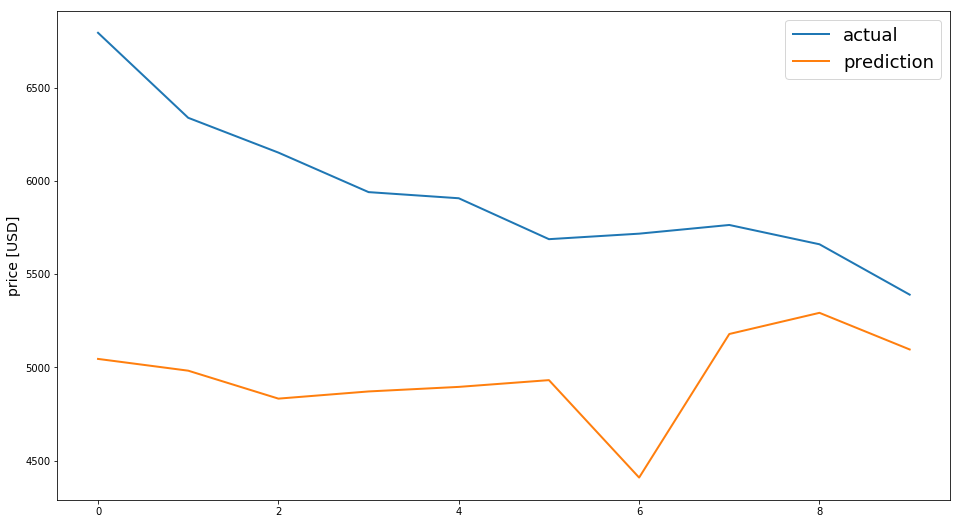

In [16]:
# Plot results
line_plot(results_forecast_series, prediction_forecast_series, 'actual', 'prediction')